# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 7</span>

### Exercise 07.1
In the NSL simulator code we have provided, include tail corrections for potential energy, $U$, and pressure $P$.

In initialize.properties(), a method in system.cpp, we added the code to calculate p_tail and v_tail, which were previously set to zero.

### Exercise 07.2

Use the NSL simulator code to <span style="color:red">print out instantaneous values of potential energy per particle, $U/N$, along **equilibrated** Monte Carlo simulations</span> (of $M=5\times 10^5$ MC steps and where the Metropolis acceptance ratio has been fixed approximately to 50%) in the following thermodynamic conditions:
- solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
- liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
- gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

1. <span style="color:red">Once this data has been produced, compute and make pictures with a python script of the autocorrelation functions of $U/N$ to approximately estimate how large the blocks in your simulations should be.
2. Use the same data to study, with a python script, the estimation of the statistical uncertainties of the expectation value of $U/N$ for different size of the blocks in the data blocking technique, from $L=M/N=10$ to $L=5\times 10^3$, being $N$ the number of blocks. <span style="color:red">Make pictures of these statistical uncertainties as a function of $L$.</span> What you observe in the statistical uncertainties after that the block size is large enough (from the point of view of the data blocking technique)?

The first step is to determine how many steps the system needs to reach equilibrium. Below, we have plotted the graphs for pressure and potential energy per particle. This is done by selecting accurate delta values (which need to be manually changed each time in the input.dat file) to achieve a 50% acceptance rate. For the gas phase, the best achievable acceptance rate is 60%.
- solid phase: DELTA = 0.05;
- liquid phase: DELTA = 0.1;
- gas phase: DELTA = 7.0.

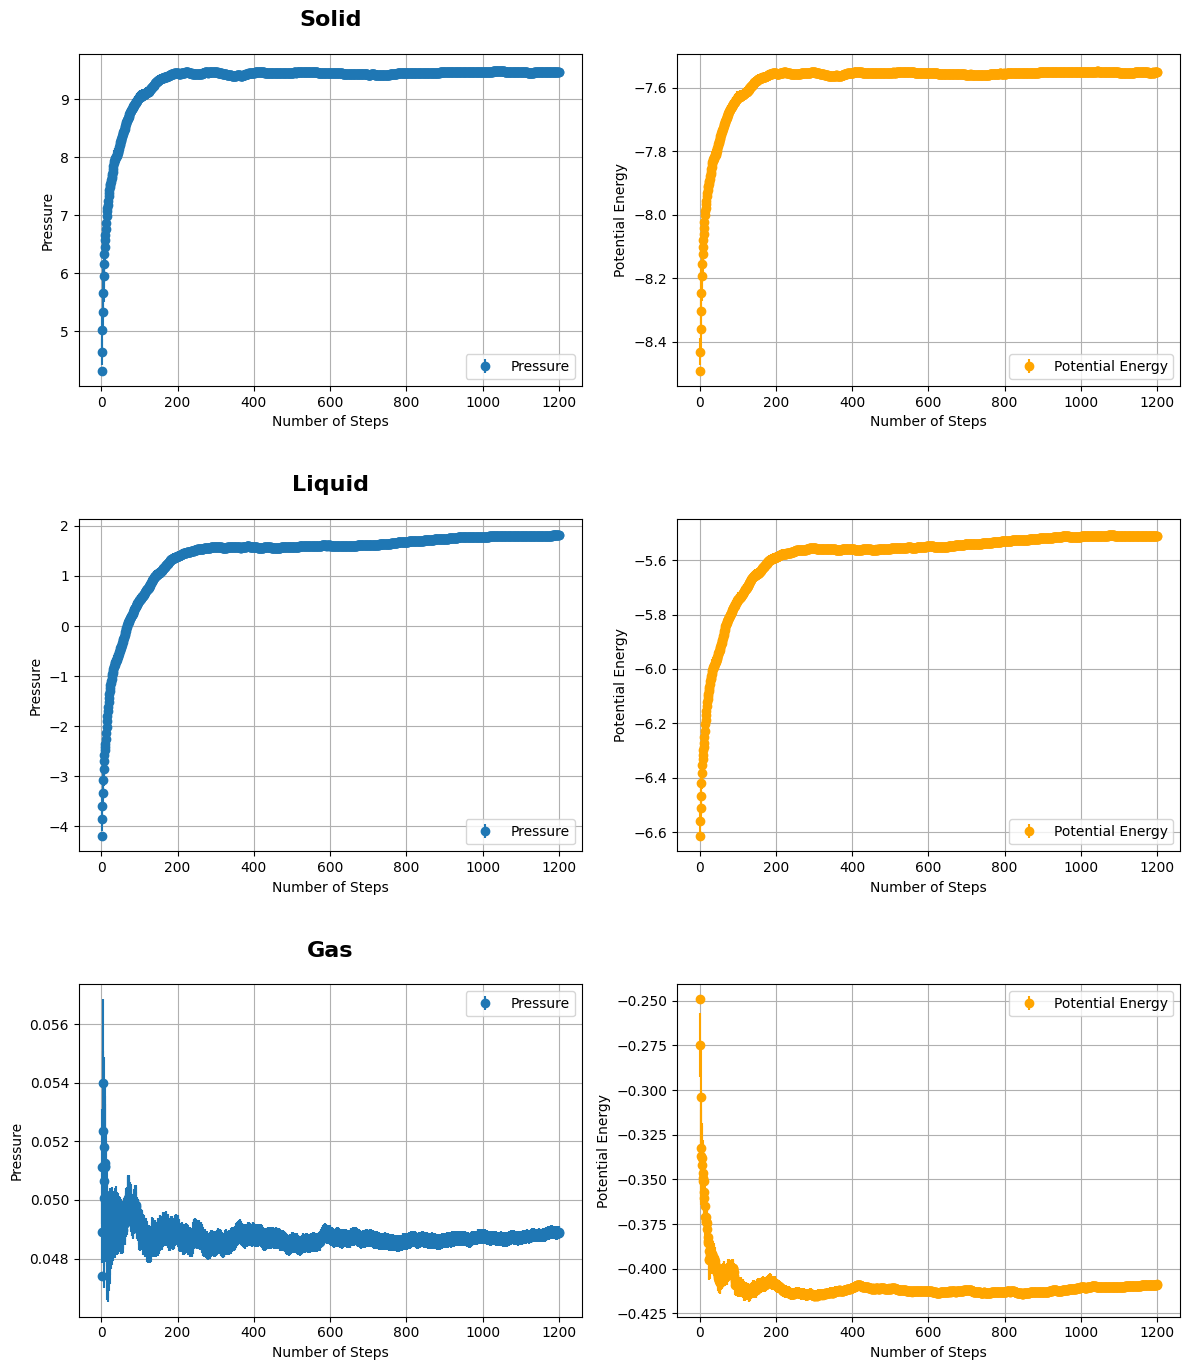

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def read_data(file_path):
    """
    Reads data from a file and returns x, y, error.
    
    Parameters:
    file_path (str): The path to the file to be read.
    
    Returns:
    tuple: Three lists containing x, y and error.
    """
    data = np.loadtxt(file_path, usecols=(0, 2, 3))
    x = data[:, 0]
    y = data[:, 1]
    error = data[:, 2]
    return x, y, error
    
file_paths = [
    '../OUTPUT/pressure_solid_equilibrium.dat', '../OUTPUT/potential_energy_solid_equilibrium.dat',
    '../OUTPUT/pressure_liquid_equilibrium.dat', '../OUTPUT/potential_energy_liquid_equilibrium.dat',
    '../OUTPUT/pressure_gas_equilibrium.dat', '../OUTPUT/potential_energy_gas_equilibrium.dat',
]

titles = [
    "Solid",
    "Liquid",
    "Gas"
]

fig, axs = plt.subplots(3, 2, figsize=(12, 15))

for i in range(3):
    axs[i, 0].set_title(titles[i], fontsize=16, fontweight='bold', pad=20)

for i in range(3):
    x1, y1, error1 = read_data(file_paths[2*i])
    x2, y2, error2 = read_data(file_paths[2*i + 1])
    
    axs[i, 0].errorbar(x1, y1, yerr=error1, fmt='o', label='Pressure')
    axs[i, 0].set_xlabel('Number of Steps')
    axs[i, 0].set_ylabel('Pressure')
    axs[i, 0].legend()
    axs[i, 0].grid(True)
    
    axs[i, 1].errorbar(x2, y2, yerr=error2, fmt='o', label='Potential Energy', color='orange')
    axs[i, 1].set_xlabel('Number of Steps')
    axs[i, 1].set_ylabel('Potential Energy')
    axs[i, 1].legend()
    axs[i, 1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.subplots_adjust(hspace=0.4)
plt.show()

We can consider the system to be equilibrated after 300 steps. Therefore, in NSL_SIMULATOR.cpp, we run the system for 500 steps before taking measurement and then we reset the blocks. Hence, for the graphs shown later on, the step counting begins after these 500 initial steps.

In [9]:
##### FUNCTIONS FOR PYTHON SCRIPT #####
import os
import subprocess
import shutil
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#####  AUTOCORRELATION FUNCTION  #####
def autocorrelation(x, nsteps):
    ac = np.zeros(nsteps)
    t_max = len(x)
    sigma = np.std(x)
    for delta_t in range(nsteps):
        a = 0.0
        b = 0.0
        c = 0.0
        t_fin = t_max - delta_t
        for t in range(t_fin):
            a += x[t]*x[t + delta_t]
            b += x[t]
            c += x[t + delta_t]
        ac[delta_t] = ((a/t_fin) - (b/t_fin) * (c/t_fin))/(sigma*sigma)

    return ac

## Potential energy and pressure in the three phases

Below are plotted the values of pressure and potential energy in the three phases, over 50000 Monte Carlo steps that have already been equilibrated.

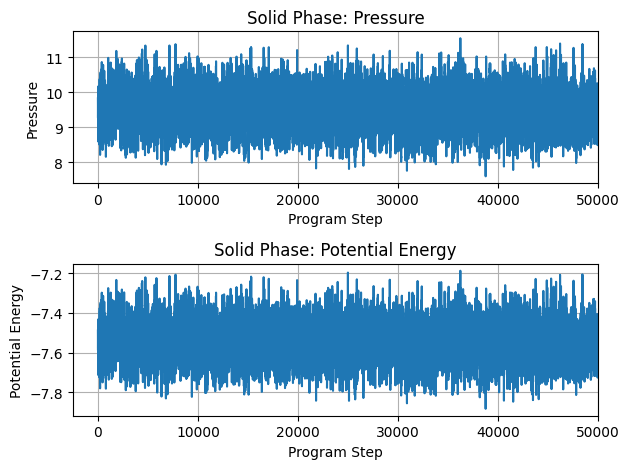

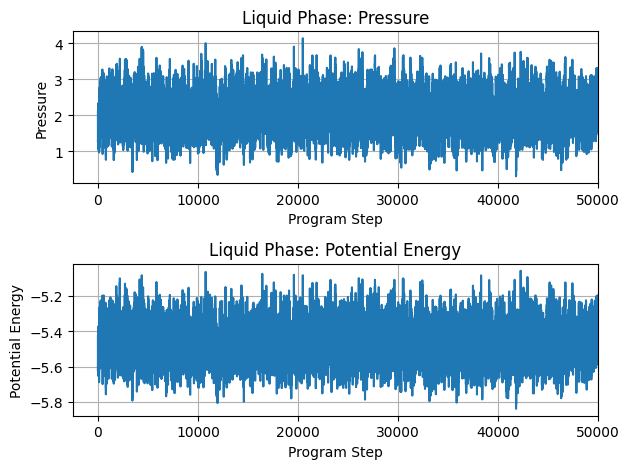

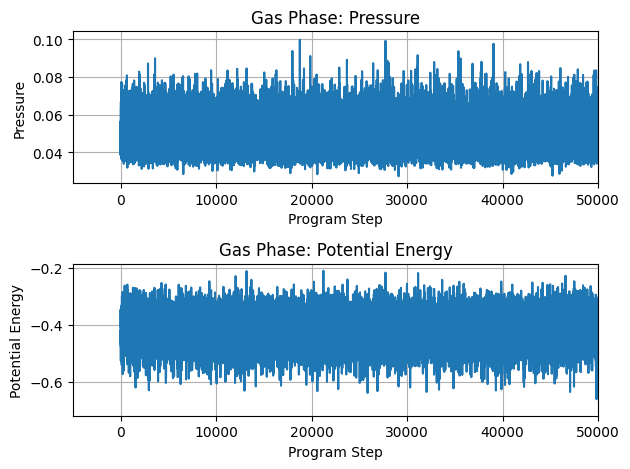

In [7]:
phases = ['solid', 'liquid', 'gas']

for phase in phases:
    # Collect pressure and potential energy data
    pressure = np.loadtxt(f'../OUTPUT/pressure_{phase}_100000.dat', usecols=(1,))
    potential_energy = np.loadtxt(f'../OUTPUT/potential_energy_{phase}_100000.dat', usecols=(1,))
    steps_pressure = np.loadtxt(f'../OUTPUT/pressure_{phase}_100000.dat', usecols=(0,))
    steps_potential_energy = np.loadtxt(f'../OUTPUT/potential_energy_{phase}_100000.dat', usecols=(0,))
    
    # Plot for pressure
    plt.subplot(2, 1, 1)
    plt.plot(steps_pressure, pressure)
    plt.xlabel('Program Step')
    plt.ylabel('Pressure')
    plt.title(f'{phase.capitalize()} Phase: Pressure')
    plt.xlim(right=50000)
    plt.grid(True)
    
    # Plot for potential energy
    plt.subplot(2, 1, 2)
    plt.plot(steps_potential_energy, potential_energy)
    plt.xlabel('Program Step')
    plt.ylabel('Potential Energy')
    plt.title(f'{phase.capitalize()} Phase: Potential Energy')
    plt.xlim(right=50000)
    plt.grid(True)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

## Autocorrelation function

Since the Metropolis algorithm shows high correlation among data, it is crucial to take actions aimed at preventing this correlation from affecting the final results.

This is why we need to measure the correlation MC-time $t_c$: it is the MC-time interval (i.e., MC-steps) $t_c = t_f - t_i$ in which we can reach no correlation between the first observable measurement $x(t_i)$ and the final one $x(t_f)$.

To evaluate $t_c$, we need the autocorrelation function $\chi(t)$, defined as follows:

$$\chi(t) = \frac{\langle x(\bar{t}) \cdot x(\bar{t} + t) \rangle - \langle x(\bar{t}) \rangle \cdot \langle x(\bar{t} + t) \rangle}{\sigma_x^2}$$

where $t = \Delta t$ is the MC time between two consecutive measurements $x(t_i) = x(\bar{t})$ and $x(t_f) = x(t_i + \Delta t) = x(\bar{t} + t)$. It's easy to understand that when there is high correlation between the two measurements, $\chi(t)$ is large and positive, whereas it tends to zero when the two measurements are evaluated at two times far apart. So we expect an exponential behavior:

$$\chi(t) \approx e^{-\frac{t}{t_c}}$$

This provides us with a method to evaluate $t_c$. Of course, if $t = t_c$, the autocorrelation is decreased by a factor $(e^{-1})$, but it is not so close to zero; so it is conventionally chosen as a proper MC step $t = 2t_c$.

With the data collected in the previous point we calculate the Autocorrelation function and show the graphs below.

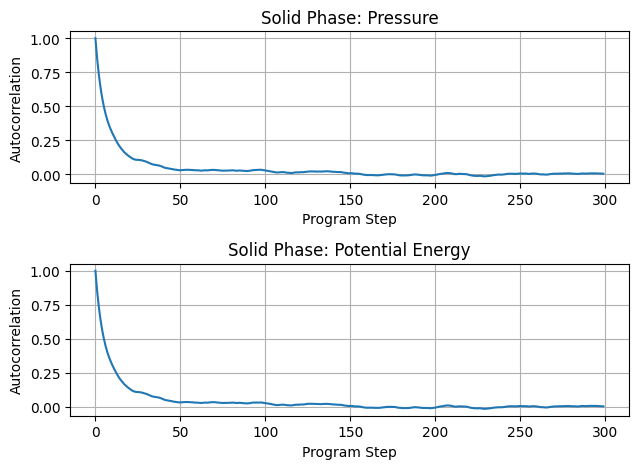

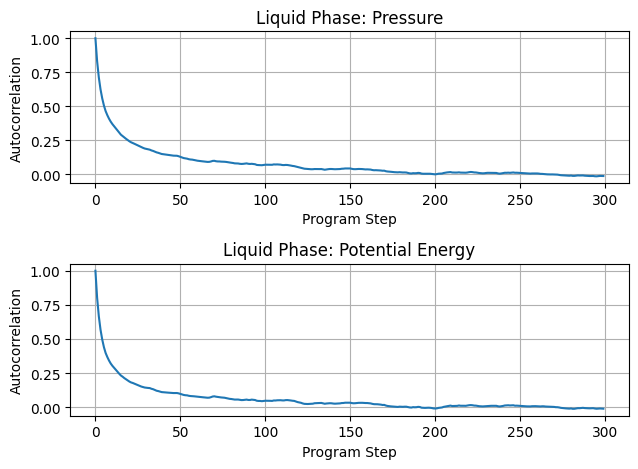

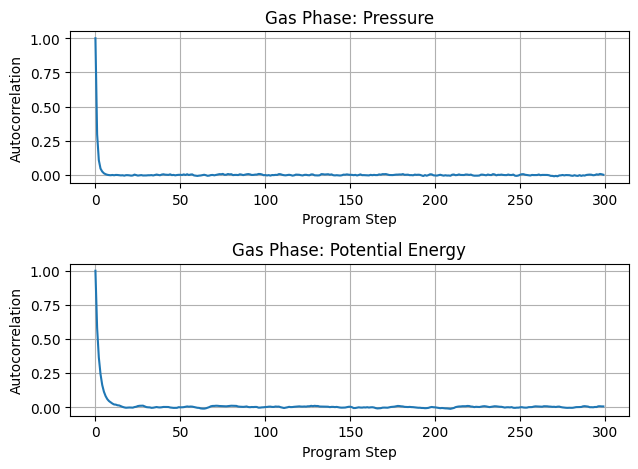

In [10]:
phases = ['solid', 'liquid', 'gas']
nsteps = 300
steps = np.arange(nsteps)

for phase in phases:
    # Collect pressure and potential energy data
    pressure = np.loadtxt(f'../OUTPUT/pressure_{phase}_100000.dat', usecols=(1,))
    potential_energy = np.loadtxt(f'../OUTPUT/potential_energy_{phase}_100000.dat', usecols=(1,))
    
    # Calculate autocorrelation for pressure and potential energy
    autocorr_pressure = autocorrelation(pressure, nsteps)
    autocorr_potential_energy = autocorrelation(potential_energy, nsteps)
    
    # Plot for pressure
    plt.subplot(2, 1, 1)
    plt.plot(steps, autocorr_pressure)
    plt.xlabel('Program Step')
    plt.ylabel('Autocorrelation')
    plt.title(f'{phase.capitalize()} Phase: Pressure')
    plt.grid(True)
    
    # Plot for potential energy
    plt.subplot(2, 1, 2)
    plt.plot(steps, autocorr_potential_energy)
    plt.xlabel('Program Step')
    plt.ylabel('Autocorrelation')
    plt.title(f'{phase.capitalize()} Phase: Potential Energy')
    plt.grid(True)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

## Statistical uncertainties as a function of $L$

In [12]:
def error_data_blocking(array, N):
    average = 0.0
    devstd = 0.0
    #av_prog = 0.0
    devstd_prog = 0.0
    for i in range(0, N):
        average += array[i]
        devstd += array[i]**2
        #av_prog = average/(i+1)
        devstd_prog = np.sqrt((devstd/(i+1) - (average/(i+1))**2)/(i+1))
    return devstd_prog

#potrei aggiungere return av_prog ma in questo caso non serve

def find_divisors(n):
    divisors = []
    for i in range(1, n + 1):
        if n % i == 0:
            divisors.append(i)
    return divisors

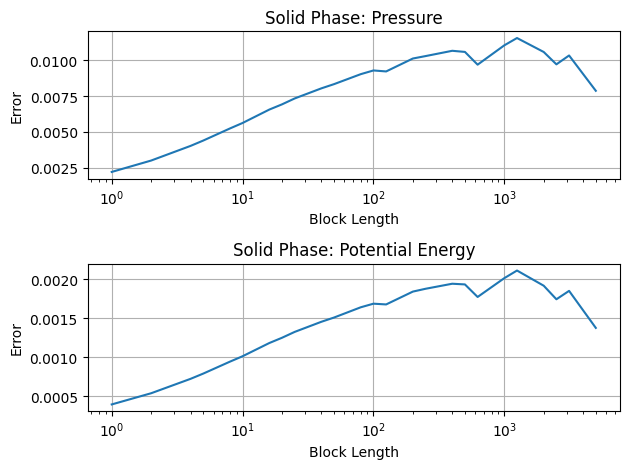

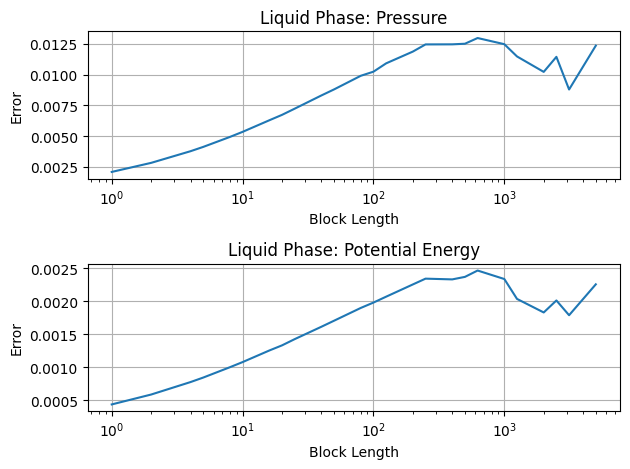

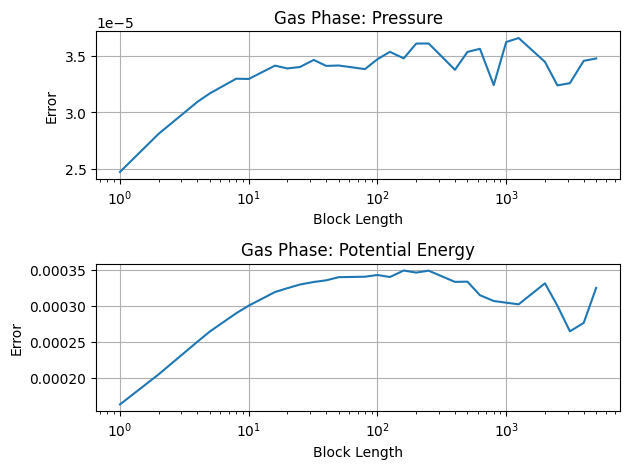

In [15]:
phases = ['solid', 'liquid', 'gas']

for phase in phases:
    if phase == 'gas':
        M = 100000
    else:
        M = 50000
    
    divisors = [d for d in find_divisors(M) if d <= 5000]
    
    pressure = np.loadtxt(f'../OUTPUT/pressure_{phase}_100000.dat', usecols=(1,))
    potential_energy = np.loadtxt(f'../OUTPUT/potential_energy_{phase}_100000.dat', usecols=(1,))
    error_pressure = []
    error_potential_energy = []
    block_lengths = []
    
    for L in divisors:
        N = int(M/L)
        assert len(pressure) == N * L, "The total number of elements must be equal to N * L."
        assert len(potential_energy) == N * L, "The total number of elements must be equal to N * L."
        
        # Reshape the array into an N x L matrix
        reshaped_pressure = pressure.reshape(N, L)
        reshaped_potential_energy = potential_energy.reshape(N, L)
        
        # Calculate the mean along axis 1 (along columns for each sub-array)
        mean_pressure = reshaped_pressure.mean(axis=1)
        mean_potential_energy = reshaped_potential_energy.mean(axis=1)
        
        error_pressure.append(error_data_blocking(mean_pressure, N))
        error_potential_energy.append(error_data_blocking(mean_potential_energy, N))
        block_lengths.append(L)
    
    # Plot for pressure
    plt.subplot(2, 1, 1)
    plt.plot(block_lengths, error_pressure)
    plt.xscale('log')
    plt.xlabel('Block Length')
    plt.ylabel('Error')
    plt.title(f'{phase.capitalize()} Phase: Pressure')
    plt.grid(True)
    
    # Plot for potential energy
    plt.subplot(2, 1, 2)
    plt.plot(block_lengths, error_potential_energy)
    plt.xscale('log')
    plt.xlabel('Block Length')
    plt.ylabel('Error')
    plt.title(f'{phase.capitalize()} Phase: Potential Energy')
    plt.grid(True)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

We observe that there is an initial interval where the error increases monotonically with the block size, while for $L \gtrsim 100$, a stationary behavior is shown. This provides another useful indication for selecting an appropriate value of $L$.

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the NSL simulator code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.

The analytical expression for the radial density is:

$$g(r) = \frac{1}{\rho N \Delta V(r)} \sum_{i=1}^N \sum_{j=1,j\neq i}^N \delta(r - |\vec{r}_i - \vec{r}_j|)$$

where $\Delta V(r) = \frac{4\pi}{3}[(r + dr)^3 - r^3]$ is the volume of the shell of thickness $dr$.

In order to implement this formula, we consider half of the box side $L_{box}$ divided into $n = 100$ bins in order to obtain a discrete sequence of positions $r_0, r_1, \ldots, r_n \in [0, L_{box}/2]$ with the bin size corresponding to the infinitesimal distance $dr$.

Then we need to fill a histogram increasing the bin of $r_h$ by 2 (because it is reciprocal!) when two particles are found at distance between $r_h$ and $r_h + dr$. At the end we normalize the histogram with the quantity $\rho N \Delta V(r)$.

### Exercise 07.4

By means of your upgraded NSL simulator code, equilibrate and <span style="color:red">perform MC NVT simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

show in pictures the obtained average values and uncertainties for the potential energy per particle, $U/N$, the pressure $P$ and the radial distribution function $g(r)$ in LJ units ... <span style="color:red"> and compare your MC results for the radial distribution function, $g(r)$, with those obtained with Molecular Dynamics NVE simulations in similar thermodynamic conditions.</span>

First, we need to determine how many steps are required for the program to reach the desired temperature in the NVE simulation. Below is a graph showing the temperature variation as a function of simulation steps in the NVE ensemble, for both gas and liquid phases, as well as the solid phase.

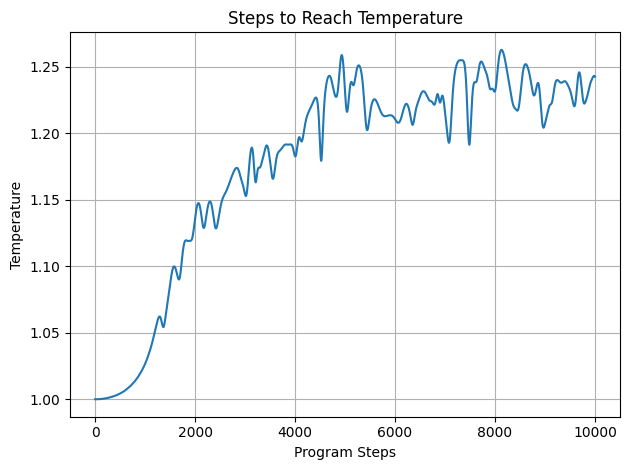

In [16]:
temperature = np.loadtxt('../OUTPUT/temperature_gas_NVE.dat', usecols=(1,))
steps_temperature = np.loadtxt('../OUTPUT/temperature_gas_NVE.dat', usecols=(0,))
plt.plot(steps_temperature, temperature)
plt.xlabel('Program Steps')
plt.ylabel('Temperature')
plt.title('Steps to Reach Temperature')
plt.grid(True)

plt.tight_layout()
plt.show()

In the gas phase we need around 6000 steps.

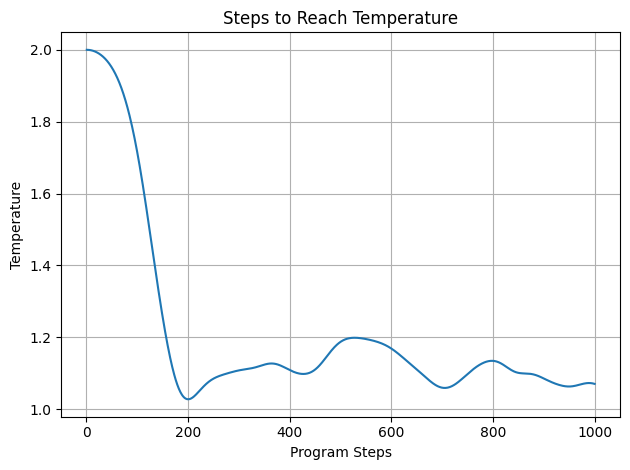

In [18]:
temperature = np.loadtxt('../OUTPUT/temperature_liquid_NVE.dat', usecols=(1,))
steps_temperature = np.loadtxt('../OUTPUT/temperature_liquid_NVE.dat', usecols=(0,))
plt.plot(steps_temperature, temperature)
plt.xlabel('Program Steps')
plt.ylabel('Temperature')
plt.title('Steps to Reach Temperature')
plt.grid(True)

plt.tight_layout()
plt.show()

In the liquid phase we need around 400 steps.

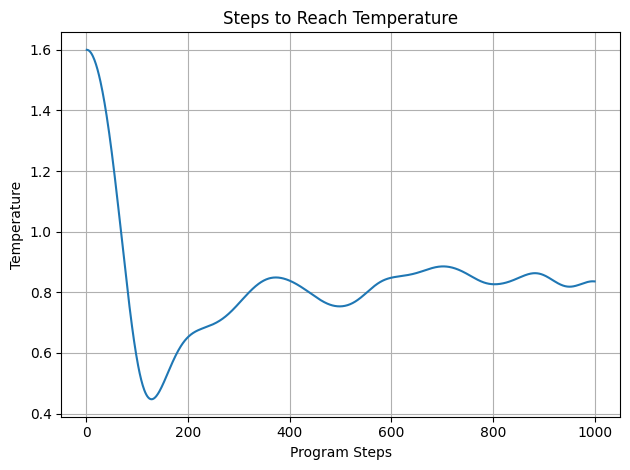

In [19]:
temperature = np.loadtxt('../OUTPUT/temperature_solid_NVE.dat', usecols=(1,))
steps_temperature = np.loadtxt('../OUTPUT/temperature_solid_NVE.dat', usecols=(0,))
plt.plot(steps_temperature, temperature)
plt.xlabel('Program Steps')
plt.ylabel('Temperature')
plt.title('Steps to Reach Temperature')
plt.grid(True)

plt.tight_layout()
plt.show()

Also in the solid phase we need around 400 steps.

Now we can study the radial distribution function.

## Radial distribution function

The following graphs are obtained by using 100 blocks of 300 steps each.

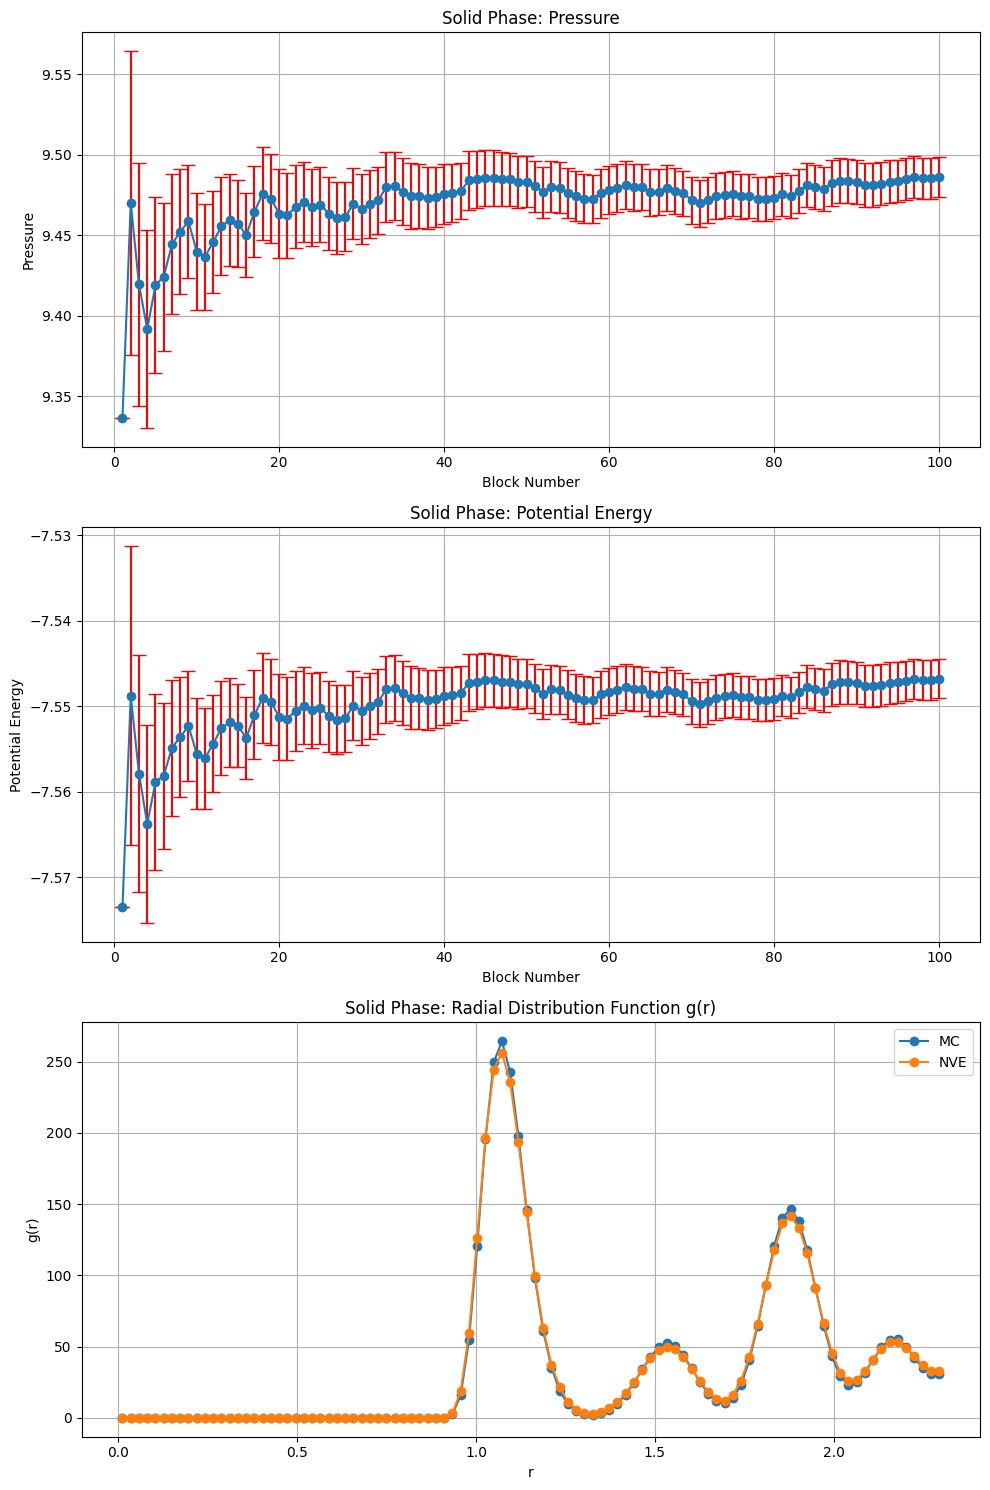

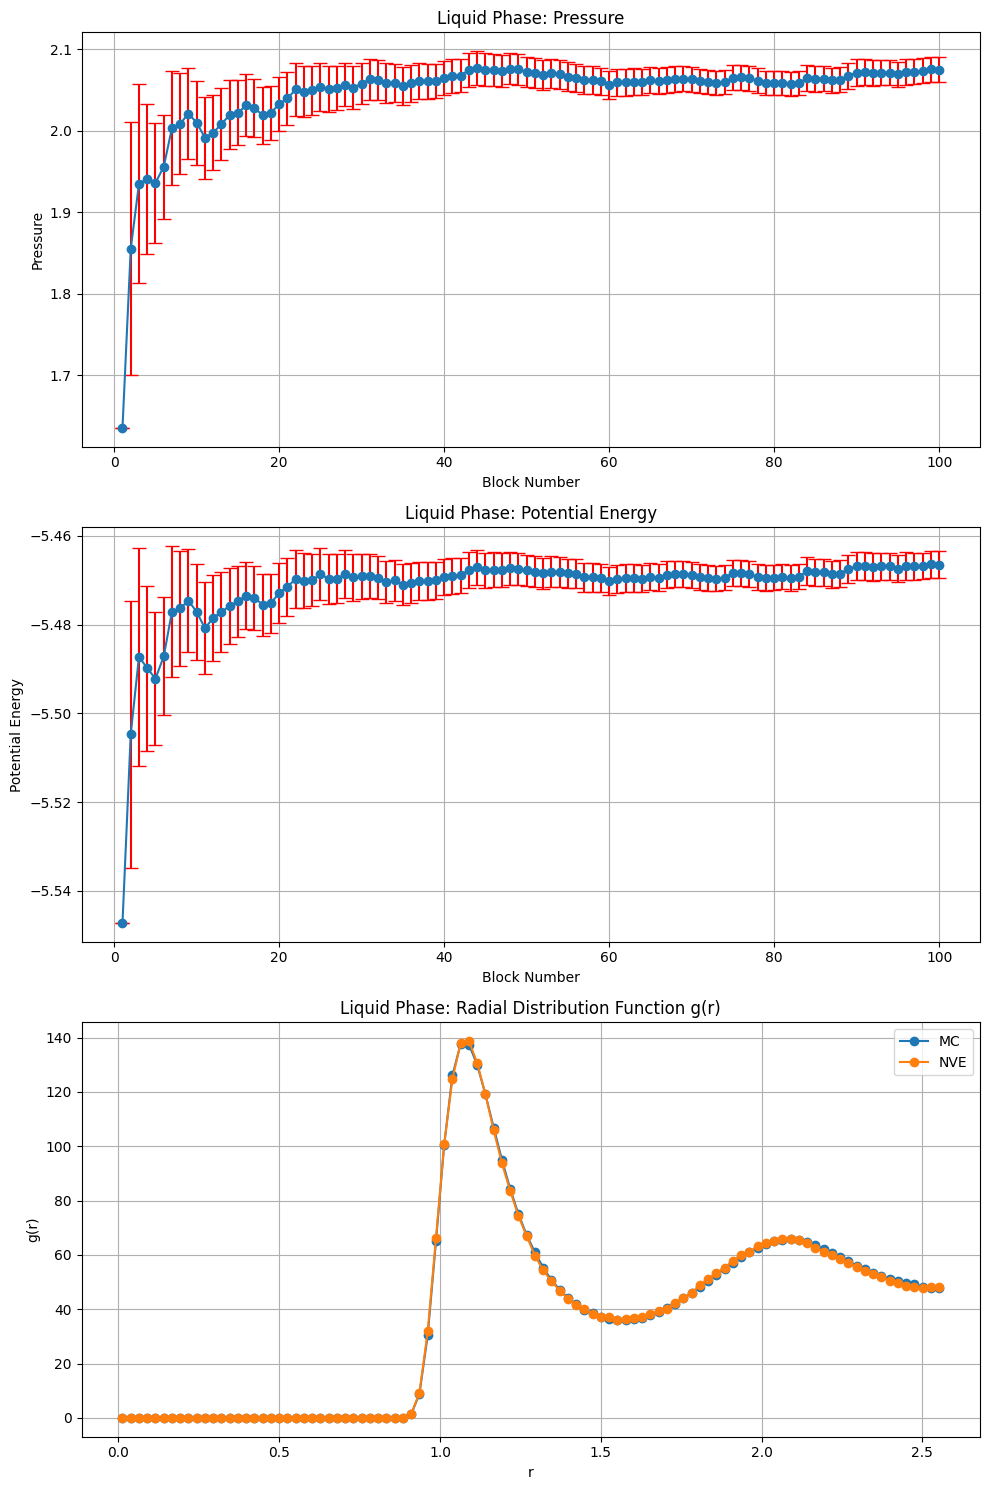

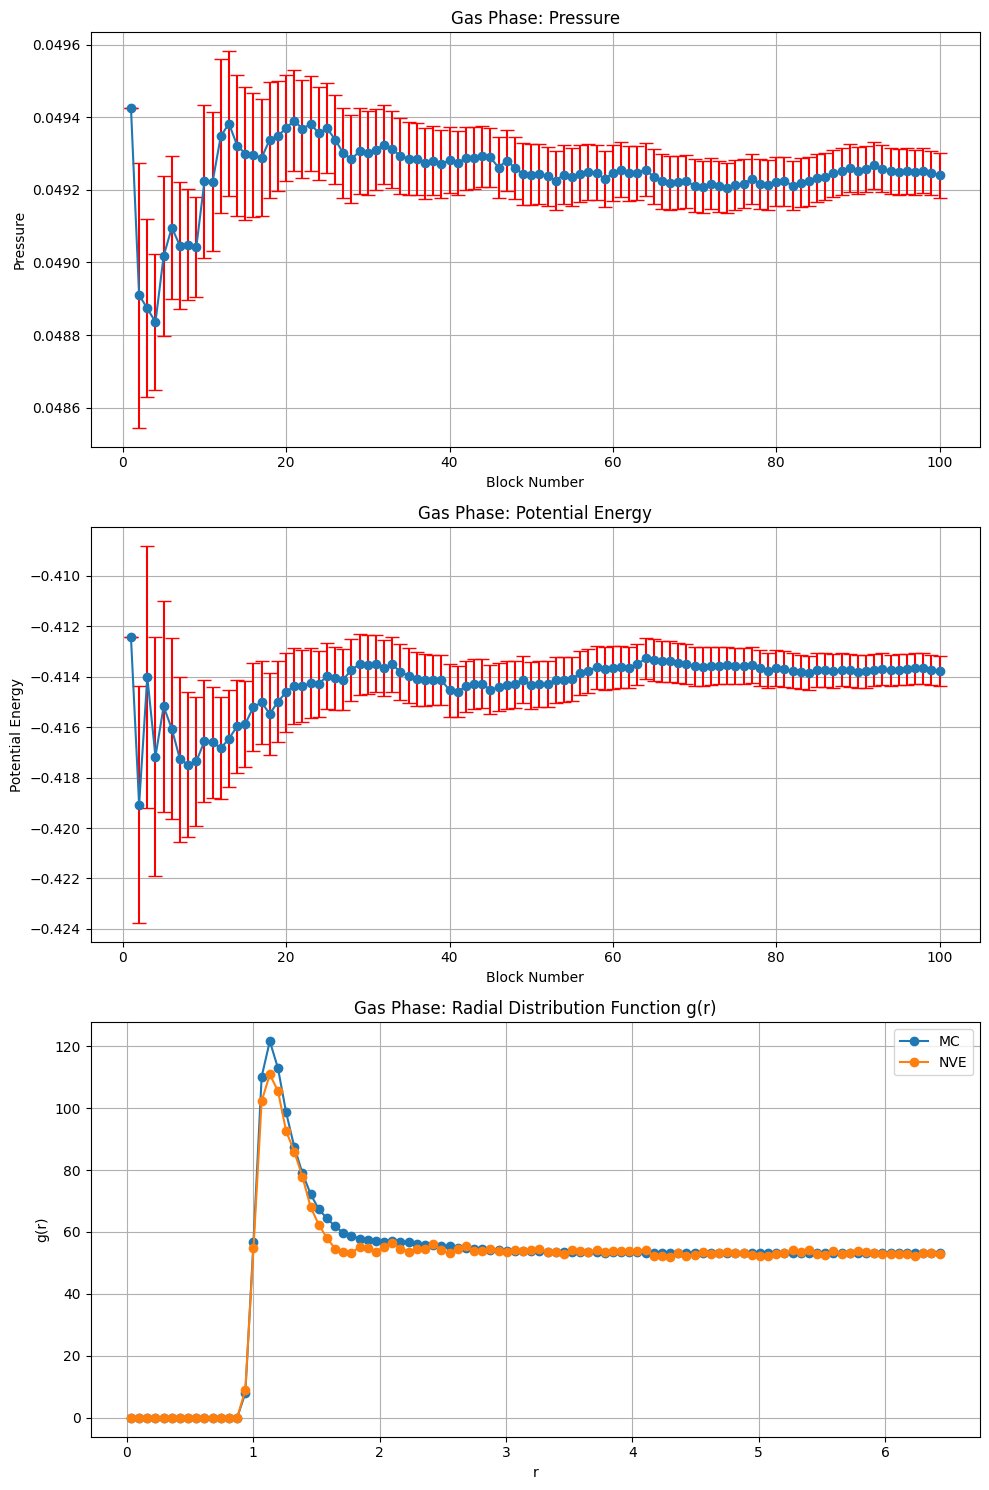

In [22]:
phases = ['solid', 'liquid', 'gas']
# Execute the program for each phase
for phase in phases:
    # Data reading
    n_block_p, pressure, err_p = np.loadtxt(f'../OUTPUT/pressure_{phase}.dat', usecols=(0, 2, 3), unpack=True)
    n_block_e, potential_energy, err_pe = np.loadtxt(f'../OUTPUT/potential_energy_{phase}.dat', usecols=(0, 2, 3), unpack=True)
    x_MC, gofr_MC = np.loadtxt(f'../OUTPUT/gofr_{phase}_MC.dat', usecols=(0, 1), unpack=True)
    x_NVE, gofr_NVE = np.loadtxt(f'../OUTPUT/gofr_{phase}_NVE.dat', usecols=(0, 1), unpack=True)
    
    # Creating the plots
    fig, axs = plt.subplots(3, 1, figsize=(10, 15))
    # Plot for pressure
    axs[0].errorbar(n_block_p, pressure, yerr=err_p, fmt='-o', ecolor='r', capsize=5)
    axs[0].set_xlabel('Block Number')
    axs[0].set_ylabel('Pressure')
    axs[0].set_title(f'{phase.capitalize()} Phase: Pressure')
    axs[0].grid(True)
    # Plot for potential energy
    axs[1].errorbar(n_block_e, potential_energy, yerr=err_pe, fmt='-o', ecolor='r', capsize=5)
    axs[1].set_xlabel('Block Number')
    axs[1].set_ylabel('Potential Energy')
    axs[1].set_title(f'{phase.capitalize()} Phase: Potential Energy')
    axs[1].grid(True)
    # Plot for radial distribution function (g(r))
    axs[2].errorbar(x_MC, gofr_MC, fmt='-o', ecolor='r', capsize=5, label='MC')
    axs[2].errorbar(x_NVE, gofr_NVE, fmt='-o', ecolor='b', capsize=5, label='NVE')
    axs[2].set_xlabel('r')
    axs[2].set_ylabel('g(r)')
    axs[2].set_title(f'{phase.capitalize()} Phase: Radial Distribution Function g(r)')
    axs[2].grid(True)
    axs[2].legend()
    
    # Show the plots
    plt.tight_layout()
    plt.show()